# [망델브로 집합](https://ko.wikipedia.org/wiki/%EB%A7%9D%EB%8D%B8%EB%B8%8C%EB%A1%9C_%EC%A7%91%ED%95%A9)
- 브누아 망델브로가 고안한 프랙털의 일종이다.
- Mandelbrot 세트를 시각화하는 것은 기계 학습과 관련이 없지만 일반적인 수학에 TensorFlow를 사용하는 방법에 대한 재미있는 예를 만든다. 
- 시각화의 매우 단순한 구현을 강조한다.
- 더 아름다운 이미지를 생성하기 위해보다 정교하게 구현할 수 있다.

https://colab.research.google.com/drive/1F0KAJTGqBgGBfoJMouy0y83CZFsiKZuX

[Mandelbrot Set - TensorFlow](https://www.tensorflow.org/tutorials/mandelbrot#mandelbrot-set)

In [0]:
# Import libraries for simulation
import tensorflow as tf
import numpy as np

# Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import Image, display

### 넘파이의 연산을 사용해 프랙탈 이미지를 그리도록 한다.

In [0]:
def DisplayFractal(a, fmt='jpeg'):
  """Display an array of iteration counts as a
     colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))

In [0]:
sess = tf.InteractiveSession()

NumPy와 TensorFlow를 함께 사용합니다.

In [0]:
# Use NumPy to create a 2D array of complex numbers
# NumPy를 사용하여 복소수의 2D 배열 만들기

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

TensorFlow 텐서를 정의하고 초기화

In [0]:
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

In [0]:
tf.global_variables_initializer().run()

In [0]:
# 새로운 값을 계산 z: z^2 + x
zs_ = zs*zs + xs

# 새로운 값과 나누어 졌는지?
not_diverged = tf.abs(zs_) < 4

# zs와 반복 횟수를 갱신하는 연산.
# 나누어진 후에 zs를 연산하도록 
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
step = tf.group(
  zs.assign(zs_),
  ns.assign_add(tf.cast(not_diverged, tf.float32))
  )

In [0]:
for i in range(200): step.run()

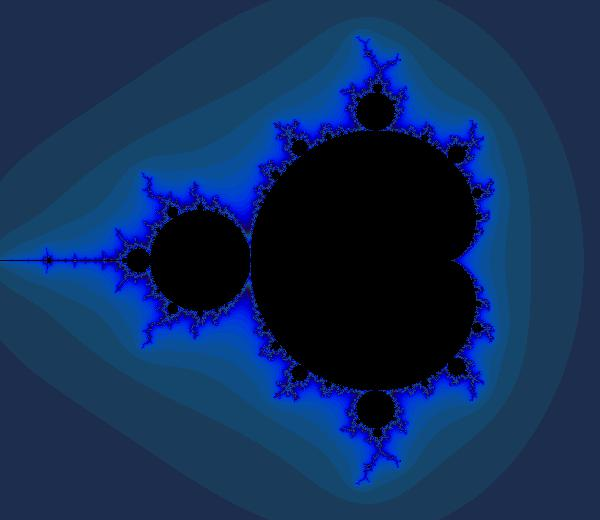

In [28]:
DisplayFractal(ns.eval())